## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!



## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [36]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed()




`1.a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here. 

In [37]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset. [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)

In [38]:
#show the total number of rows
df.shape

(69889, 3)

`c)` The proportion of users converted.  [Helpful  Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

In [39]:
#calculate the proportion of converted users
df.converted.sum()/len(df)

0.13047832992316388

`d)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [40]:
df.isnull().sum()

country      0
group        0
converted    0
dtype: int64

In [41]:
#display rows with missing values

rows_with_missing = df[df.isnull().any(axis=1)]
print(rows_with_missing)

Empty DataFrame
Columns: [country, group, converted]
Index: []


`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [42]:
# number of visitors from each country

df['country'].value_counts()

US    48850
UK    17551
CA     3488
Name: country, dtype: int64

In [43]:
# Count the total number of visitors in the control group and treatment group

total_control_visitors = df.query('group == "control"').shape[0]

#Print results
print("Total number of control visitors:", total_control_visitors)

Total number of control visitors: 34678


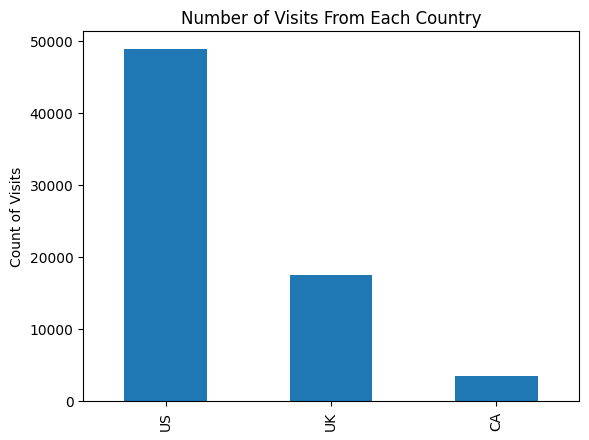

In [44]:
# bar chart of results
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

**`f)` Recognize that all of your columns are of a categorical data type with the exception of one.  Which column is not categorical**? [Helpful Pandas Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

- The 'converted' column is not categorical, int64 indicates it contains numerical data making it non-categorical.

In [45]:
#check the data types of each column
print(df.dtypes)

country      object
group        object
converted     int64
dtype: object


**`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not?**


If the values in 'converted' are only 0 and 1, it makes sense because: 

   - Conversion is often a binary outcome: A user either converted or they didn't.
    
   - Binary values are useful for statistical analysis, making it easier to calculate conversion rates, compare groups, and perform statistical tests.
    
   - If there are values other than 0 and 1, it could indicate data entry issues or inconsistencies in the dataset. 

In [46]:
# Get unique values in the converted column
unique_values = df['converted'].unique()
print("Unique values in 'converted' column:", unique_values)

Unique values in 'converted' column: [0 1]


<a id='probability'></a>
#### Part II - Probability

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [47]:
#calculate the probability of conversion

conversion_probability = df['converted'].mean()
print("Probability of Conversion:", conversion_probability)

Probability of Conversion: 0.13047832992316388


In [48]:
# Display the probability as a percentage

print(f"Probability of Conversion: {conversion_probability:.2%}")

Probability of Conversion: 13.05%


`b)` Given that an individual was in the `control` group, what is the probability they converted? 

In [49]:
df.query('group == "control"')['converted'].mean()


0.1052540515600669

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [50]:
# Calculate the probability of conversion for the treatment group

treatment_conversion_probability = df.query('group=="treatment"')['converted'].mean()
print("Probability of conversion in the treatment group:", treatment_conversion_probability)

Probability of conversion in the treatment group: 0.15532078043793132


**`d)` Do you see evidence that the treatment is related to higher `converted` rates?**

- Based on the experiment results, the tretment conversion rate is 15.5% while the control conversion rate is 10.% resulting in a 5% increase (delta) in conversion for the treatment group over the control. This indicates that the treatment may be more effective in driving conversions than the control.

In [51]:
# Calculate the difference in conversion probabilities

conversion_difference = treatment_conversion_probability - df.query('group == "control"')['converted'].mean()
print("Difference in conversion probabilities:", conversion_difference)

Difference in conversion probabilities: 0.050066728877864425


`e)` What is the probability that an individual was in the `treatment`?

In [52]:
# Calculate the probability of being in the treatment group

treatment_probability = df['group'].value_counts(normalize=True)['treatment']
print("Probability of being in the treatment group:", treatment_probability)

Probability of being in the treatment group: 0.5038131894861853


`f)` What is the probability that an individual was from Canada `CA`?

In [53]:
# Calculate the probability of being from Canada (CA)

canada_probability = df['country'].value_counts(normalize=True)['CA']
print("Probability of being from Canada (CA):", canada_probability)

Probability of being from Canada (CA): 0.04990771079855199


`g)` Given that an individual was in the `US`, what was the probability that they `converted`?

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [54]:
df.query('country == "US"')['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [55]:
df.query('country == "UK"')['converted'].mean()

0.12512107572218106

**`i)` Do you see evidence that the `converted` rate might differ from one country to the next?**

- Yes, the 'converted' rate is not exactly the same for each contry.

In [56]:
# Calculate the difference in conversion probabilities between US and UK

us_conversion_probability = df.query('country == "US"')['converted'].mean()
uk_conversion_probability = df.query('country == "UK"')['converted'].mean()
ca_conversion_probability = df.query('country == "CA"')['converted'].mean()
conversion_difference_countries = us_conversion_probability - uk_conversion_probability - ca_conversion_probability

print("Difference in conversion probabilities (US, CA, UK):", conversion_difference_countries)

Difference in conversion probabilities (US, CA, UK): -0.11763397563109526


**`j)` Consider the table below, does it appear that there could be an interaction between how country and treatment impact conversion?**

- Looking at the table, there does appear to be some variation in convesion rates across contries when comparing treatment and control groups, which may suggest an interaction between country and treatment. The differing effect sizes across countries suggest that the treatment might influence users differently depending on their location. This variation indicates a potential interaction between country and treatment, where the impact of the treatment might depend on the country.


$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

$P(\text{converted} == 1|(\text{country} ==\text{"UK" AND }\text{group} ==\text{"control"})) = 10.16\%$

$P(\text{converted} == 1|(\text{country} ==\text{"UK" AND }\text{group} ==\text{"treatment"})) = 14.87\%$

$P(\text{converted} == 1|(\text{country} ==\text{"CA" AND }\text{group} ==\text{"control"})) = 9.45\%$

$P(\text{converted} == 1|(\text{country} ==\text{"CA" AND }\text{group} ==\text{"treatment"})) = 15.40\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.16%     |  9.45%      |
| Treatment   | 15.8%       |  14.87%     |  15.40%     |

In [57]:
# Calculate conversion probabilities for the UK

uk_control_conversion_probability = df.query('country == "UK" and group == "control"')['converted'].mean()
uk_treatment_conversion_probability = df.query('country == "UK" and group == "treatment"')['converted'].mean()

# Calculate conversion probabilities for Canada

ca_control_conversion_probability = df.query('country == "CA" and group == "control"')['converted'].mean()
ca_treatment_conversion_probability = df.query('country == "CA" and group == "treatment"')['converted'].mean()

# Print the results formatted as percentages

print(f"UK Control Conversion Rate: {uk_control_conversion_probability:.2%}")
print(f"UK Treatment Conversion Rate: {uk_treatment_conversion_probability:.2%}")
print(f"CA Control Conversion Rate: {ca_control_conversion_probability:.2%}")
print(f"CA Treatment Conversion Rate: {ca_treatment_conversion_probability:.2%}")

UK Control Conversion Rate: 10.16%
UK Treatment Conversion Rate: 14.87%
CA Control Conversion Rate: 9.45%
CA Treatment Conversion Rate: 15.40%


In [58]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])
print(df.query('country == "UK" and group == "control" and converted == 1').shape[0]/df.query('country == "UK" and group == "control"').shape[0]) 
print(df.query('country == "UK" and group == "treatment" and converted == 1').shape[0]/df.query('country == "UK" and group == "treatment"').shape[0])
print(df.query('country == "CA" and group == "control" and converted == 1').shape[0]/df.query('country == "CA" and group == "control"').shape[0]) 
print(df.query('country == "CA" and group == "treatment" and converted == 1').shape[0]/df.query('country == "CA" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848
0.10164866401364411
0.148698035632709
0.0944741532976827
0.15401662049861495


In [59]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

In [60]:
df.query('country == "UK"').groupby('group')['converted'].mean()

group
control      0.101649
treatment    0.148698
Name: converted, dtype: float64

In [61]:
df.query('country == "CA"').groupby('group')['converted'].mean()

group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.1%      |  9.4%       |
| Treatment   | 15.8%       |  15.7%      |  15.4%      |

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  



`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. 



In [62]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

In [63]:
# Display results
print("Conversion rate under the null hypothesis (p_control_treatment_null):", p_control_treatment_null)
print("Sample size for the treatment group (n_treatment):", n_treatment)
print("Sample size for the control group (n_control):", n_control)

Conversion rate under the null hypothesis (p_control_treatment_null): 0.13047832992316388
Sample size for the treatment group (n_treatment): 35211
Sample size for the control group (n_control): 34678


`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [64]:
# treatment_converted = 
# n_treatment transactions with the conversion rate under the null hypothesis
treatment_converted = np.random.binomial(1, p_control_treatment_null, n_treatment)

# Convert to a list 
treatment_converted = treatment_converted.tolist()

# Show first few results to confirm the output
print(treatment_converted[:10]) 

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]


`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [65]:
# n_control transactions with the conversion rate under the null hypothesis
control_converted = np.random.binomial(1, p_control_treatment_null, n_control)

# Convert to a list 
control_converted = control_converted.tolist()

# Show firts few rows for a quick check
print(control_converted[:10])

[0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [66]:
# Calculate the conversion rate for treatment and control group

p_treatment_null_estimate = np.mean(treatment_converted)
p_control_null_estimate = np.mean(control_converted)

# Calculate the difference in conversion rates under the null hypothesis
p_difference_null = p_treatment_null_estimate - p_control_null_estimate

# Print the result
print("Estimated difference in conversion rates (treatment - control) under null:", p_difference_null)

Estimated difference in conversion rates (treatment - control) under null: 0.005073690616107268


`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [67]:
p_diffs = []

# Conversion rates under the null hypothesis
p_control_treatment_null = df['converted'].mean()

for _ in range(500):
    # simulate the treatment and control converted arrays
    treatment_bootsamp = np.random.binomial(1, p_control_treatment_null, n_treatment)
    control_bootsamp = np.random.binomial(1, p_control_treatment_null, n_control)

    # calculate p_treatment and p_control under the null
    p_treatment_null_estimate = treatment_bootsamp.mean()
    p_control_null_estimate = control_bootsamp.mean()

    # calculate the difference between p_treatment_null and p_control_null
    p_diff = p_treatment_null_estimate - p_control_null_estimate

    # add p_diff to the p_diffs array
    p_diffs.append(p_diff)

p_diffs = np.array(p_diffs)
  
# Print the first few differences to check
print("First few differences in conversion rates:", p_diffs[:10])

First few differences in conversion rates: [-0.00125473  0.00153725  0.00461751 -0.00535737 -0.00240468 -0.00280752
 -0.00506377 -0.00017334 -0.0032069   0.00011593]


`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  

- Yes, I expected the plot of this historgram to take the shape of a bell shape curve.

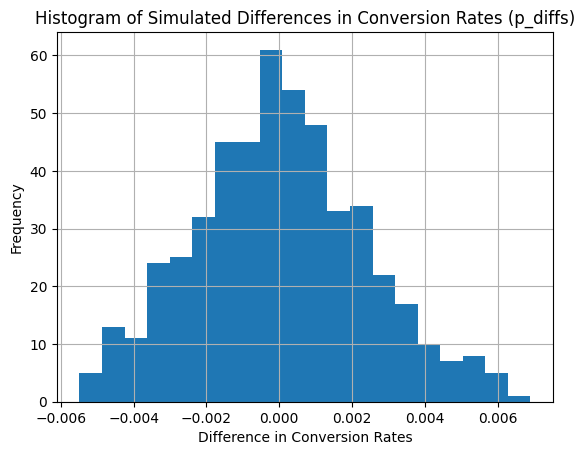

In [104]:
p_diffs = pd.Series(p_diffs)

p_diffs.hist(bins=20)
plt.title("Histogram of Simulated Differences in Conversion Rates (p_diffs)")
plt.xlabel("Difference in Conversion Rates")
plt.ylabel("Frequency")
plt.show()

**`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?**

- The proportion of p_diffs that are greater than the observed difference in conversion rates between the treatment and control group is 0 which shows a normal distribution.

In [68]:
# Observed difference in conversion rates
observed_diff = df[df['group'] == 'treatment']['converted'].mean() - df[df['group'] == 'control']['converted'].mean()

# Find how many simulated differences are greater than the observed difference
greater_than_observed = [diff for diff in p_diffs if diff > observed_diff]

# Calculate the proportion
proportion = len(greater_than_observed) / len(p_diffs)
print("Proportion of p_diffs greater than observed difference:", proportion)

Proportion of p_diffs greater than observed difference: 0.0


**`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?**

In part g) we computed the p-value, this p-value represents the probability of observing a difference in conversion rates between the treatment and control groups as extreme as, or more extreme than the null hypothesis.

Type 1 error rate of 0.05
* If the p-value is less than 0.05, we would reject the null hypothesis, suggesting that there is enough evidence to show that the tretment page may indeede improve conversion rates compared to the control page. If the p-value
    
* If the p-value is greater than 0.05, we would fail to reject the null hypothesis, indicating that any observed difference is likely due to r andom chance rather than a true effect, and we would conclude that there's insufficient evidence to support a difference in conversion rates between the new and old pages.
    
The p-value quantifies how compatible our observed data is with the null hypothesis. A low p-value (below 0.05) would lead us to conclude that the tretment page has a statistically significant impact on conversions, while a higher p-value suggests that we don't have enough evidence to claim a difference. 

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  



**`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?**

- Since the outcome is binary, either a user converts or does not convert, so **Logistic Regression** should be used. Logistic regression is suitable for binary classification problems and will allow us to predict the probability of conversion based on the treatment or control group assignment.

**`b)` First you need to create a column for the intercept, and create a dummy variable column for which page each user received.**  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.


Below you can see an example of the new columns that will need to be added (The order of columns is not important.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   |
| ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  0          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  1          |
| 1           |  treatment  |  1          |  0          |
| 1           |  control    |  0          |  1          |

In [69]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,0
1,US,treatment,1,1,1
2,UK,treatment,0,1,1
3,UK,control,0,1,0
4,UK,treatment,0,1,1


**`c)`  Create `X` matrix and `y` response column that will be passed to the model, where you are testing if there is a difference in `treatment` vs. `control`.**

In [70]:
X = df[['intercept', 'ab_page']]
y = df['converted']

**`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`.** 


In [71]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


**`e)` Provided summary of the model below.**

In [28]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                0.007175
Time:                        12:28:01   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


**`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.**

The p-value for ab_page is 0.000. This p-value indicates that there is strong statistical evidence to suggest that the ab_page variable, treatment page, has an effect on the conversion rate. This p-value is small enough to reject the null hypothesis that there is no difference in conversion rates between the treatment and contorol pages.

In the experimentation section I concluded that the treatment page had a stastically significant effect on conversions based on the observed delta and p-value. This logistic regression results confirms that conclusion by showing the treatment page has statistically significant impact on conversion, as evidenced by the low p-value associated with ab_page.

**`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.**  Again, use `get_dummies` to add these columns.  The dataframe created will include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`.  The order of rows and columns is not important for you to match - it is just to illustrate how columns should connect to one another.):

##### Example DataFrame
| intercept   | group       | ab_page     | converted   | country     |  US         | UK          |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  0          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  0          |  US         |  1          |  0          |
| 1           |  treatment  |  1          |  1          |  CA         |  0          |  0          |
| 1           |  treatment  |  1          |  1          |  UK         |  0          |  1          |
| 1           |  treatment  |  1          |  0          |  US         |  1          |  0          |
| 1           |  control    |  0          |  1          |  US         |  1          |  0          |

In [72]:
# Create the necessary dummy variables

country_dummies = pd.get_dummies(df['country'])
df = pd.concat([df, country_dummies[['US', 'UK']]], axis=1)

#Show the updated dataframe
df.head()

,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,0,0,1
1,US,treatment,1,1,1,1,0
2,UK,treatment,0,1,1,0,1
3,UK,control,0,1,0,0,1
4,UK,treatment,0,1,1,0,1


**`b)`  Create `X` matrix and `y` response column that will be passed to model, where you are testing if there is**
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [74]:
# X = 
X = df[['intercept', 'ab_page', 'US', 'UK']]

# y = 
y = df['converted']

#Show first few rows of x to check
X.head()

,intercept,ab_page,US,UK
0,1,0,0,1
1,1,1,1,0
2,1,1,0,1
3,1,0,0,1
4,1,1,0,1


**`c)` Use **statsmodels** to import and fit regression model on the `X` and `y` from part `b)`.** 


In [75]:
# logit model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

# Print the model summary
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                0.007312
Time:                        15:35:53   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1930      0.053    -41.308      0.000      -2.297      -2.089
ab_page        0.4466      0.

**`d)` Provide the summary of your model below.**

The model suggests a significant difference in conversion rates based on page type but no significant difference by country. The positive coefficient for the treatment page variable suggests that users exposed to the treatment page have higher log-odds of converting compared to those who see the control page. The extremely low p-value associated with this coefficient (< 0.001) supports the conclusion that this effect is statistically significant, meaning there is strong evidence that the treatment page impacts conversions.

The country variables (US and UK) do not show significant effects on conversion rates. The coefficients for both the US and UK are close to zero, and their p-values are relatively high (0.170 for US and 0.905 for UK), indicating no statistically meaningful difference in conversion rates based on a user’s country. This implies that whether a user is from the US, UK, or Canada does not significantly affect their likelihood to convert, after accounting for the page type.



**`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`?**

The p-values associated with the US (0.170) and UK (0.905) variables suggest that neither country has a statistically significant impact on the conversion rate, relative to Canada (which serves as the baseline group).

US: With a p-value of 0.170, the effect of being from the US on conversion is not statistically significant at a typical significance level of 0.05. This means there is no sufficient evidence to conclude that users from the US are more or less likely to convert than users from Canada.

UK:The p-value for the UK variable is even higher at 0.905, indicating an even weaker association. This implies there is very little evidence to suggest any difference in conversion rates for users from the UK compared to users from Canada.

These p-values indicate that the country of orgin whether US or UK does not significantly affect conversion rates in this model.

<a id='finalcheck'></a>
## You have reached the end of the A/B Test Results project!


